# Algerina_Forest_MahchineLearning_Project - Model

### 1 - Train_test_split
### 2 - Scalling & Transforming
### 3 - Training Model
### 4 - Predicting a Model
### 5 - Accuracy Score - different metrices
### 6 - Evalluating a Best fit Model
### 7 - Hyper paramer tuning - Mostly use [GridSearchCV,RandomizedSearchCV]
### 8 - Best feature selecting
### 9 - Deploying - MLOps......................

## Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [115]:
df = pd.read_csv("Algerian_fires_data_Cleaned.csv")

In [119]:
df1 = df.drop(['day', 'month', 'year','Rain','Region','RH','DC','BUI'],axis=1)
X = df1.drop(['FWI', 'Classes'], axis=1)
print(df1.columns)
print(X.columns)

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI', 'FWI', 'Classes'], dtype='object')
Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')


In [116]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.Classes = np.where(df.Classes == 'not fire',0,1)

<AxesSubplot:xlabel='FWI', ylabel='Count'>

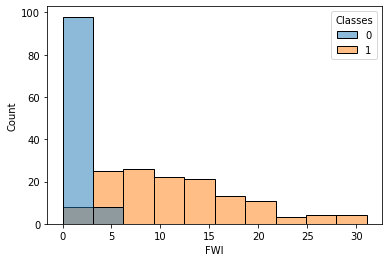

In [7]:
g = df.groupby(['FWI'])['Classes']
sns.histplot(x='FWI',hue='Classes',data=df)

In [8]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

### Regression Task

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [10]:
X = df.drop('FWI',axis=1)
y = df['FWI']
X.shape

(243, 11)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [13]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


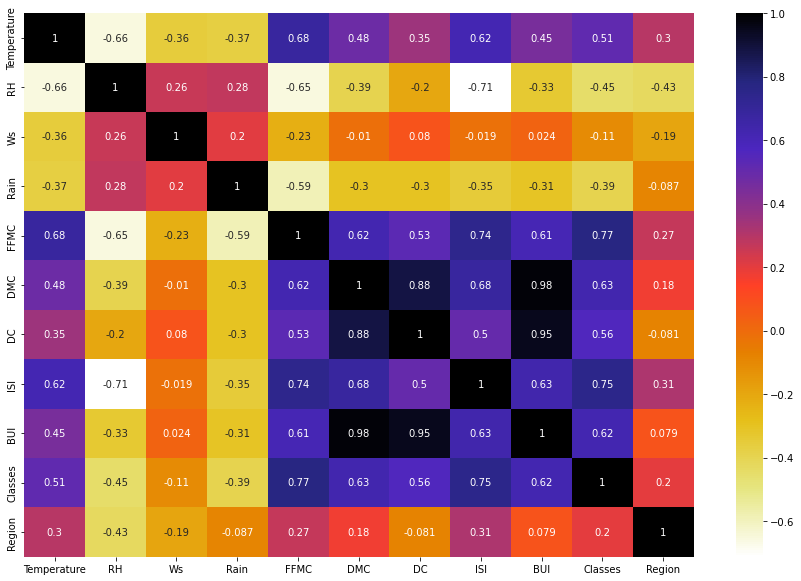

In [14]:
plt.figure(figsize=(15,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
def correlation(dataset, thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_feature = correlation(X_train, 0.75)
corr_feature

{'BUI', 'Classes', 'DC'}

In [17]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


In [18]:
X_train.corr().iloc[10,2]

-0.1912451613133325

In [19]:
corr_set = set()
for i in range(len(X_train.corr().columns)):
    for j in range(i):
        if abs(X_train.corr().iloc[i,j]) > 0.75:
            print(X_train.corr().columns[i])
            corr_set.add(X_train.corr().columns[i])
print(corr_set)

DC
BUI
BUI
Classes
{'BUI', 'Classes', 'DC'}


In [20]:
X_train.drop(corr_feature, axis=1, inplace= True)
X_test.drop(corr_feature, axis=1, inplace= True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

### Applying a Standardizations and Feature Scalling

In [21]:
def scaler_standard(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled,X_test_scaled

In [22]:
X_train_scaled,X_test_scaled =scaler_standard(X_train,X_test)

Text(0.5, 1.0, 'X_train with Scalling')

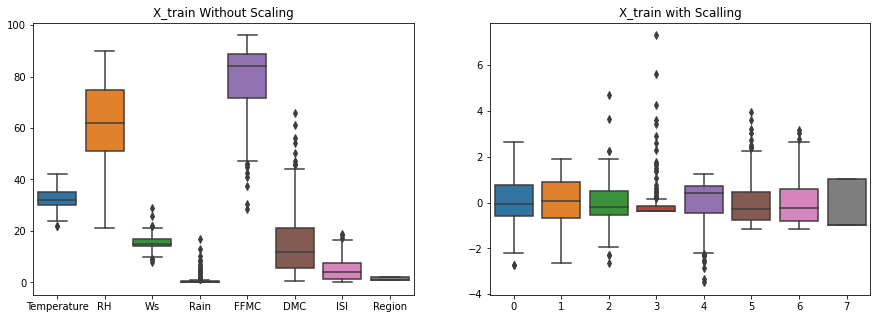

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Without Scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train with Scalling')

# Model Selection for Regression

### Simple Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
lin_reg_pred = lin_reg.predict(X_test_scaled)

lin_reg.score(X_test_scaled,y_test)

0.970007251469972

### Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
lasso_pred = lasso.predict(X_test_scaled)

### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
ridge_pred = ridge.predict(X_test_scaled)

### Support Vector Regression

In [27]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled,y_train)
svr_pred = svr.predict(X_test_scaled)

### Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_scaled,y_train)
rfr_pred = rfr.predict(X_test_scaled)

### K-Neighbors Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train_scaled,y_train)
knr_pred = knr.predict(X_test_scaled)

#### Regression Model results Summary

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score

lin_mae = mean_absolute_error(y_test,lin_reg_pred)
lasso_mae = mean_absolute_error(y_test,lasso_pred)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
svr_mae = mean_absolute_error(y_test,svr_pred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)
knr_mae = mean_absolute_error(y_test,knr_pred)

lin_r2 = r2_score(y_test,lin_reg_pred)
lasso_r2  = r2_score(y_test,lasso_pred)
ridge_r2 = r2_score(y_test,ridge_pred)
svr_r2 = r2_score(y_test,svr_pred)
rfr_r2 = r2_score(y_test,rfr_pred)
knr_r2 = r2_score(y_test,knr_pred)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(np.sqrt(-scores))
print(scores.mean())
print(scores.std())

[1.18165995 0.87853025 0.96277517 2.64652756 1.38506459]
-2.403516749642237
2.3348644676670745


In [33]:
model_name= ['LinearRegression','Lasso','Ridge','SVR','RandomForest','KNN']
MAE = [lin_mae,lasso_mae,ridge_mae,svr_mae,rfr_mae,knr_mae]
R2Score = [lin_r2,lasso_r2,ridge_r2,svr_r2,rfr_r2,knr_r2]

In [34]:
results = pd.DataFrame({'model_name':model_name,'MAE':MAE,'R2Score':R2Score})

In [35]:
results.sort_values(['R2Score'],ascending=False)

,model_name,MAE,R2Score
4,RandomForest,0.589361,0.979473
0,LinearRegression,0.645319,0.970007
2,Ridge,0.664769,0.968992
5,KNN,0.981639,0.942237
1,Lasso,1.120918,0.937661
3,SVR,0.867593,0.933966


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Regressor     | 98.18 % |
| Linear Regression  | 97.00 % |
| Ridge Regression  | 96.90 % |
| K Neighbors Regressor  | 94.22 %|
| Lasso Regression  | 93.77 % |
| Support Vector Regressor     | 93.40 % |

### Linear Regression is second best accurate as per score best is RandomForestRegressor
## RandomForest Regression Selecting for Evaluating

# Hyper parameter Tunig - Model tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import OneHotEncoder,PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [37]:
lin_reg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [38]:
param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]},]

grid_cv = GridSearchCV(rfr, param_grid, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

grid_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(rfr,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [40]:
print(grid_cv.best_params_)
print(grid_cv.best_estimator_)


{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30)


In [41]:
print('best_param',Random_rf.best_params_)
print('Best estimator',Random_rf.best_estimator_)
best_random_grid = Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

best_param {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}
Best estimator RandomForestRegressor(bootstrap=False, max_depth=120, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=6)


In [42]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011389,0.004316,0.001999,1.094974e-03,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-7.852823,-2.595766,...,-4.386779,1.967436,18,-8.160536e-01,-1.772935e+00,-1.700609e+00,-2.235441e+00,-1.614673e+00,-1.627942e+00,4.592815e-01
1,0.019396,0.000491,0.002199,3.998757e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.552646,-1.866354,...,-3.266589,0.879418,13,-5.857731e-01,-8.198903e-01,-8.019671e-01,-4.745089e-01,-4.158527e-01,-6.195984e-01,1.655794e-01
2,0.056167,0.001937,0.004197,4.000664e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-4.250789,-1.881910,...,-3.486965,1.053346,14,-3.526541e-01,-4.202522e-01,-7.003565e-01,-3.882408e-01,-6.453933e-01,-5.013794e-01,1.427116e-01
3,0.007396,0.000490,0.001200,3.998280e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.850330,-2.552282,...,-3.214288,1.229529,11,-1.227410e+00,-1.250215e+00,-1.131126e+00,-8.575190e-01,-8.192542e-01,-1.057105e+00,1.834022e-01
4,0.020189,0.000978,0.002394,4.846017e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.997786,-1.499822,...,-2.809102,0.773482,6,-6.882607e-01,-3.848276e-01,-7.820260e-01,-3.840945e-01,-5.679301e-01,-5.614278e-01,1.596416e-01
5,0.060165,0.002481,0.004798,4.000703e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.597438,-1.387717,...,-2.335667,0.637305,2,-2.958758e-01,-4.096828e-01,-4.420275e-01,-2.571145e-01,-3.550628e-01,-3.519527e-01,6.869473e-02
6,0.008198,0.000397,0.001199,3.998284e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.993483,-2.062763,...,-2.865910,0.734497,7,-9.041303e-01,-1.142038e+00,-6.803044e-01,-1.035114e+00,-7.821233e-01,-9.087421e-01,1.665139e-01
7,0.037198,0.024057,0.003911,3.824782e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.496981,-1.906324,...,-2.554238,0.957085,5,-3.405041e-01,-5.091352e-01,-3.958774e-01,-4.100493e-01,-3.603712e-01,-4.031875e-01,5.846002e-02
8,0.072957,0.023985,0.004198,4.007816e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.763421,-1.867465,...,-2.378339,0.874679,3,-3.410018e-01,-3.481811e-01,-3.328218e-01,-2.835122e-01,-2.827213e-01,-3.176476e-01,2.861133e-02
9,0.007795,0.000748,0.001400,4.896679e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.765586,-1.337417,...,-3.245310,1.286405,12,-7.227663e-01,-7.100000e-01,-8.956469e-01,-8.293379e-01,-4.899848e-01,-7.295472e-01,1.381054e-01


In [43]:
featur_importance = grid_cv.best_estimator_.feature_importances_
featur_imp_2 = Random_rf.best_estimator_.feature_importances_

In [44]:
sorted(zip(featur_importance,X_train.columns.tolist()),reverse=True)

[(0.710395586039766, 'ISI'),
 (0.1458534968403427, 'DMC'),
 (0.13011848348713143, 'FFMC'),
 (0.005757727953300377, 'RH'),
 (0.004531552563128742, 'Ws'),
 (0.002179347804264769, 'Temperature'),
 (0.000875620835780717, 'Region'),
 (0.00028818447628518103, 'Rain')]

In [45]:
sorted(zip(featur_imp_2,X_train.columns.tolist()),reverse=True)

[(0.3588972688086508, 'ISI'),
 (0.21433720174531418, 'FFMC'),
 (0.21258931240859885, 'DMC'),
 (0.11300700041150963, 'Rain'),
 (0.0533879406933519, 'Temperature'),
 (0.03203625007007761, 'RH'),
 (0.011138919257746904, 'Ws'),
 (0.004606106604750153, 'Region')]

In [46]:
len(grid_cv.best_estimator_.feature_importances_)
print(X_train_scaled.shape)

(182, 8)


### Trunig Ridge Regression - Hyper parameter tuning

In [47]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action = 'ignore')

ridge_params = [{'alpha':(np.logspace(-11,11,100)),
                'solver':['auto','svd','cholesky','lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}]
ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge,ridge_params,cv=10,n_jobs = -1)
random_ridge.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'l

In [48]:
best_ridge = random_ridge.best_estimator_

rbest_pred = best_ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,rbest_pred)
r2 = r2_score(y_test,rbest_pred)


In [49]:
feature_importance = Random_rf.best_estimator_.feature_importances_
imp_df = pd.DataFrame({'feature':X_train.columns,
                       'importance':feature_importance}).sort_values('importance',ascending=False)
imp_df

,feature,importance
6,ISI,0.358897
4,FFMC,0.214337
5,DMC,0.212589
3,Rain,0.113007
0,Temperature,0.053388
1,RH,0.032036
2,Ws,0.011139
7,Region,0.004606


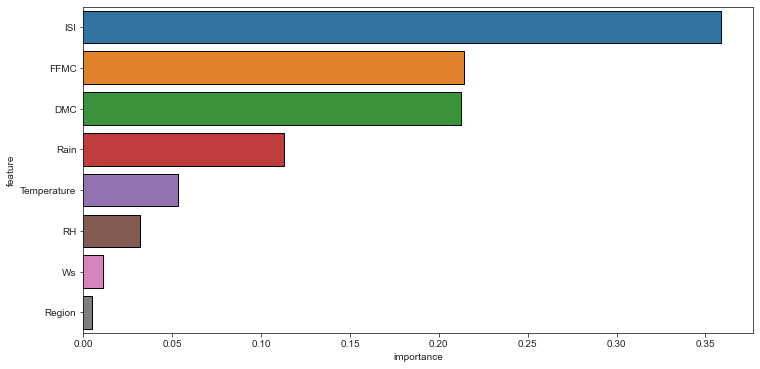

In [50]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')

ax = sns.barplot(data=imp_df,x='importance',y='feature',ec='black')


In [51]:
drop_feature = ['Rain','Region','RH']
X_train_final = X_train.drop(drop_feature, axis=1)
X_test_final = X_test.drop(drop_feature, axis=1)

In [52]:
X_train_final.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [53]:
X_train_final_scaled,X_test_final_scaled =  scaler_standard(X_train_final,X_test_final)

In [54]:
best_random_grid.fit(X_train_final_scaled,y_train)
best_rf_pred = best_random_grid.predict(X_test_final_scaled)
mae= mean_absolute_error(y_test, best_rf_pred)
r2 = r2_score(y_test, best_rf_pred)

In [55]:
import bz2,pickle
file = bz2.BZ2File('regression_rfr.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

# Classifications

GridSearchCV(
    estimator,
    param_grid,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)

RandomizedSearchCV()

RandomizedSearchCV(
    estimator,
    param_distributions,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score=nan,
    return_train_score=False,
)

GridSearchCV()

GridSearchCV(
    estimator,
    param_grid,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)

Pipeline()

Pipeline(steps, memory=None, verbose=False)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

PowerTransformer()
PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)

pt = PowerTransformer()
data = [[1, 2], [3, 2], [4, 5]]
print(pt.fit(data))

ColumnTransformer()

ColumnTransformer(
    transformers,
    remainder='drop',
    sparse_threshold=0.3,
    n_jobs=None,
    transformer_weights=None,
    verbose=False,
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

ct = ColumnTransformer(
     [("norm1", Normalizer(norm='l1'), [0, 1]),
      ("norm2", Normalizer(norm='l1'), slice(2, 4))])

X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])

ct.fit_transform(X)
array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

# Model Selection for Classifications

In [56]:
X.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [57]:
X = df.drop('Classes',axis=1)
y = df.Classes

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=36)

In [59]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

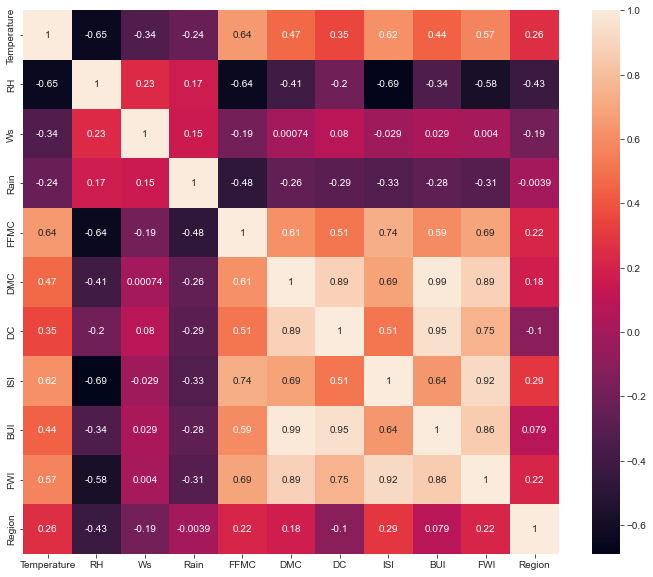

In [60]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True)
plt.show()

In [61]:
corr_featur =correlation(X_train, 0.75)

In [62]:
corr_featur

{'BUI', 'DC', 'FWI'}

In [63]:
X_train.drop(corr_featur,axis=1,inplace=True)
X_test.drop(corr_featur,axis=1,inplace = True)

In [64]:
X_train.shape,X_test.shape

((170, 8), (73, 8))

In [65]:
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

### Logistic Regression

In [66]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,f1_score,jaccard_score,log_loss                         

In [67]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=200)
lgr.fit(X_train_scaled,y_train)
lgr_pred = lgr.predict(X_test_scaled)

In [68]:
lgr_prob= lgr.predict_proba(X_test_scaled)

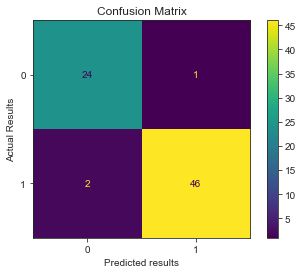

In [69]:
cm = confusion_matrix(y_test, lgr_pred, labels=lgr.classes_)
dist = ConfusionMatrixDisplay(cm,lgr.classes_)

dist.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual Results')
plt.show()

In [70]:
print(classification_report(y_test,lgr_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



### Decision Tree -Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)


In [72]:
dtc_prob= dtc.predict_proba(X_test_scaled)

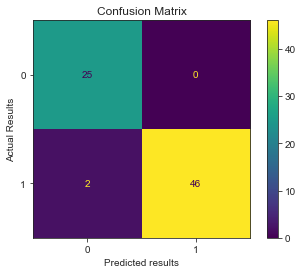

In [73]:
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
dist = ConfusionMatrixDisplay(cm,dtc.classes_)

dist.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual Results')
plt.show()

In [74]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



### Random Forest -Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)

In [76]:
rfc_prob= rfc.predict_proba(X_test_scaled)

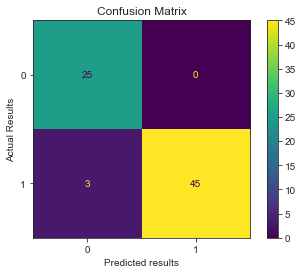

In [77]:
cm = confusion_matrix(y_test, rfc_pred, labels=rfc.classes_)
dist = ConfusionMatrixDisplay(cm,rfc.classes_)

dist.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual Results')
plt.show()

In [78]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



### KNN -Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
knc_pred = knc.predict(X_test_scaled)

In [80]:
knc_prob= knc.predict_proba(X_test_scaled)

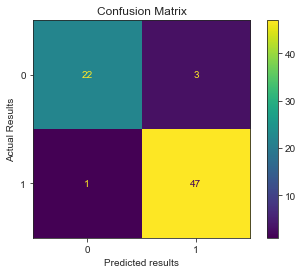

In [81]:
cm = confusion_matrix(y_test, knc_pred, labels=knc.classes_)
dist = ConfusionMatrixDisplay(cm,knc.classes_)

dist.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual Results')
plt.show()

In [82]:
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.94      0.98      0.96        48

    accuracy                           0.95        73
   macro avg       0.95      0.93      0.94        73
weighted avg       0.95      0.95      0.94        73



### XGboost -Classifier

In [83]:
#!pip install xgboost
# !conda install -c conda-forge xgboost

In [84]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)

In [85]:
xgb_prob= xgb.predict_proba(X_test_scaled)

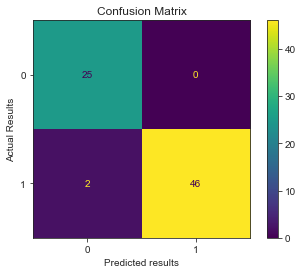

In [86]:
cm = confusion_matrix(y_test, xgb_pred, labels=xgb.classes_)
dist = ConfusionMatrixDisplay(cm,xgb.classes_)

dist.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted results')
plt.ylabel('Actual Results')
plt.show()

In [87]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [88]:
metrics = [accuracy_score,f1_score,jaccard_score,log_loss]
pred_name =['lgr_pred','dtc_pred','rfc_pred','knc_pred','xgb_pred']
pred_value = [lgr_pred,dtc_pred,rfc_pred,knc_pred,xgb_pred]
pred_dict = {i:i for i in pred_name}
pred_prob = [lgr_prob,dtc_prob,rfc_prob,knc_prob,xgb_prob]

In [89]:
all_pred = zip(pred_name,pred_value)

accu_dict = {}
accu_list = []
f1_dict = {}
f1_list = []
jaccard_dict = {}
jaccard_list = []
logloss_dict = {}
logloss_list = []

for i in all_pred:
    accu_dict[i[0]] = accuracy_score(y_test,i[1])
    accu_list.append(accuracy_score(y_test,i[1]))
    f1_dict[i[0]] = f1_score(y_test,i[1])
    f1_list.append(f1_score(y_test,i[1]))
    jaccard_dict[i[0]] = jaccard_score(y_test,i[1])
    jaccard_list.append(jaccard_score(y_test,i[1]))
    logloss_dict[i[0]] = log_loss(y_test,i[1])
    logloss_list.append(log_loss(y_test,i[1]))

In [90]:
idx = ['LogisticRegression','DecisionTree','RandomForestClassifier','K-NNClassifier','XGBClassifier']

In [91]:
results_df = pd.DataFrame({'Accuracy_score':accu_list,'F1_score':f1_list, 'Jaccard_score':jaccard_list,'log_loss':logloss_list},index=idx)

In [92]:
results_df.sort_values(['Accuracy_score'],ascending=False)

,Accuracy_score,F1_score,Jaccard_score,log_loss
DecisionTree,0.972603,0.978723,0.958333,0.946268
XGBClassifier,0.972603,0.978723,0.958333,0.946268
LogisticRegression,0.958904,0.968421,0.938776,1.419413
RandomForestClassifier,0.958904,0.967742,0.937500,1.419402
K-NNClassifier,0.945205,0.959184,0.921569,1.892569


## Hyper parameter Tuning - Model tuning

### XGBoost Classfier - Tuning

In [93]:
params ={
    'learning_rate' : (np.linspace(0,10,100)),
    'max_depth' : (np.linspace(1,50,25,dtype =int)),
    'min_child_weight' : [1, 3, 5, 7],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' :[0.3, 0.4, 0.5, 0.7]
}
Random_xgb = RandomizedSearchCV(xgb,params,cv=10,n_jobs=-1)
Random_xgb.fit(X_train_scaled,y_train).best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=7.979797979797979, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=37, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        48

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



### RandomForest Classfier - Tuning

In [95]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=5,
                       min_samples_split=7, n_estimators=115)

In [96]:
best_rf = random_rf.best_estimator_

best_rf.score(X_test_scaled,y_test)
bestrf_pred = best_rf.predict(X_test_scaled)

cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print (cr)

FINAL Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



### Applying Stratified KFold Cros-Validation to know exact mean CV Accuracy for all models

In [97]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=36)

In [98]:
model = [best_xgb, rfc, dtc, knc, lgr]
name = ['Best_XGB','RandomForest','DecisionTree','KNN','Logistic']

In [99]:
final_list = list(zip(model,name))

In [100]:
all_cv = {}
for i in final_list:
    all_cv[i[1]]=round(cross_val_score(i[0],X,y,cv=skfold,scoring='accuracy').mean(),4)

In [101]:
all_cv

{'Best_XGB': 0.9668,
 'RandomForest': 0.971,
 'DecisionTree': 0.971,
 'KNN': 0.8968,
 'Logistic': 0.9752}

In [102]:
df = pd.DataFrame({'score':[i for i in all_cv.values()]},index=[i for i in all_cv.keys()])

In [103]:
df.sort_values('score',ascending=False)

,score
Logistic,0.9752
RandomForest,0.9710
DecisionTree,0.9710
Best_XGB,0.9668
KNN,0.8968


### Feature Selections for model Deployment

In [104]:
feature_importances = Random_xgb.best_estimator_.feature_importances_

In [105]:
importances_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':feature_importances,
}).sort_values('importance',ascending=True)
importances_df

,feature,importance
0,Temperature,0.0
1,RH,0.0
2,Ws,0.0
3,Rain,0.0
4,FFMC,0.0
5,DMC,0.0
7,Region,0.0
6,ISI,1.0


Text(0, 0.5, 'Feature')

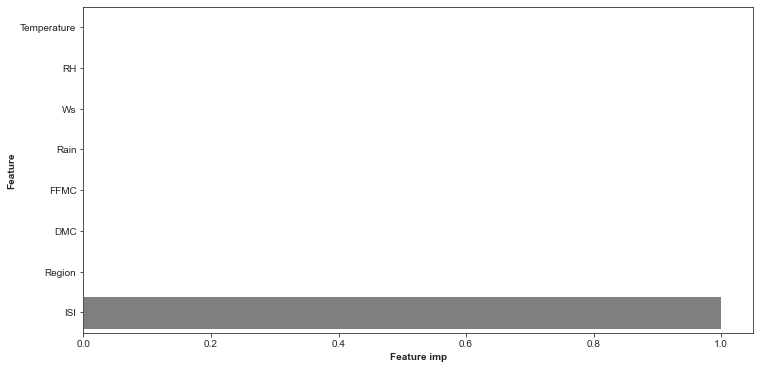

In [106]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importances_df,x='importance',y='feature')
ax.set_xlabel("Feature imp",weight='bold')
ax.set_ylabel('Feature',weight='bold')

## Model_Deployment

In [107]:
Xtrain_new = X_train.drop(['Rain', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['Rain', 'Region', 'RH'], axis=1)

In [108]:
Xtrain_new_scaled,Xtest_new_scaled = scaler_standard(Xtrain_new,Xtest_new)

In [109]:
xgb_model = Random_xgb.fit(Xtrain_new_scaled,y_train)
xgb_model.score(Xtest_new_scaled,y_test)
xgb_model_pred = xgb_model.predict(Xtest_new_scaled)
cr = classification_report(y_test,xgb_model_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [110]:
import bz2,pickle
file = bz2.BZ2File('classification.pkl','wb')
pickle.dump(xgb_model,file)
file.close()

In [111]:
Xtest_new

,Temperature,Ws,FFMC,DMC,ISI
74,33,14,87.0,21.7,5.7
215,28,16,82.2,4.4,3.3
96,29,16,80.8,3.4,2.8
63,35,14,76.6,5.7,1.7
12,27,21,50.0,6.7,0.5
...,...,...,...,...,...
80,35,19,88.3,25.9,8.8
182,38,14,78.3,4.4,2.0
27,32,14,89.1,25.5,7.6
211,34,15,89.2,24.8,8.1
